<a href="https://colab.research.google.com/github/Nataliahfk/estadistica_python/blob/main/curso_de_estadistica_con_python_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=#56B4E9 size=10>CURSO DE ESTADÍSTICA</font>
***

<font color=#56B4E9 size = 5>*Preparando el ambiente*</font>

# <font color=#56B4E9>1 CONOCIENDO LOS DATOS</font>
***

## <font color=#56B4E9>1.1 Dataset del proyecto</font>
***

### Muestra de domicilios Colombia - 2018

Las investigaciones por muestras de domicilios realizadas anualmente, buscan encontrar característcias generales de la población, de educación, trabajo, rendimiento y otras, de acuerdo con las necesidades de información del país, tales como las características de migración, fertilidad, casamientos, salud, nutrición, entre otros temas. Estas muestras al pasar de los años consistuyen una herramienta importante para la formulación, validación y evaluación de políticas dirigidas al desarrollo socioeconómico y la mejora de las condiciones de vida en Colombia.


### Datos

Los datos fueron creados  de manera didáctica para este curso.

### Variables utilizadas

> ### Ingreso
> ***

Ingresos mensuales (en miles de pesos) del trabajo principal para personas de 10 años o más.

> ### Edad
> ***

Edad del entrevistado en la fecha de referencia en años.

> ### Altura
> ***

Altura del entrevistado em metros.

> ### Ciudad
> ***

Código de referência a 27 ciudades analizadas.


> ### Sexo
> ***

|Código|Descripción|
|---|---|
|0|Masculino|
|1|Femenino|

> ### Años de Estudio
> ***

|Código|Descripción|
|---|---|
|1|Sin estudios y menos de 1 año|
|2|1 año|
|3|2 años|
|4|3 años|
|5|4 años|
|6|5 años|
|7|6 años|
|8|7 años|
|9|8 años|
|10|9 años|
|11|10 años|
|12|11 años|
|13|12 años|
|14|13 años|
|15|14 años|
|16|15 años o más|
|17|No se sabe|
||No aplica|

> ### Color
> ***

|Código|Descripción|
|---|---|
|0|Indio|
|2|Blanco|
|4|Negro|
|6|Amarillo|
|8|Moreno|
|9|Sin declarar|

> ### Tratamiento a los datos
***

> Algunos de los tratamientos de datos más frecuentes son:
> 1. Eliminar las observaciones (líneas) con entradas de datos inválidos;
> 2. Eliminar observaciones donde hay datos perdidos (missing data);
> 3. Filtros própios de la investigación, por ejemplo: considerar solo las encuestas realizadas a la cabeza de familia (responsable por el domicilio).

### Importando pandas y leyendo el dataset del projecto

https://pandas.pydata.org/

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv("/content/datos.csv")

In [4]:
datos.sample(5)

,Ciudad,Sexo,Edad,Color,Años de Estudio,Ingreso,Altura
50408,35,0,52,8,5,1500,1.715432
55829,41,1,41,2,13,2000,1.661596
28425,29,0,71,8,1,0,1.666898
33502,31,0,53,2,12,3450,1.785845
22583,26,0,40,8,12,2000,1.694906


## <font color=#56B4E9>1.2 Tipos de datos</font>
***

### Clasificación de una variable
<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img001.png' width='70%'>

### Variables cualitativas ordinales

► Variables que pueden ser ordenadas o que responen algun tipo de jerarquía

In [ ]:
sorted(datos['Años de Estudio'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

### Variables cualitativas nominales

► Variables que no pueden ser ordenadas ni responden alguna jerarquía.

In [ ]:
sorted(datos['Sexo'].unique())

[0, 1]

In [ ]:
sorted(datos['Color'].unique())

[0, 2, 4, 6, 8]

In [ ]:
sorted(datos['Ciudad'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

### Variables cuantitativas discretas

► Variables que representan un conteo donde los valores posibles forman un conjunto finito o numerable.


In [5]:
datos.Edad.min() # esta variable se puede colocar sin corchetes, por que es un solo nombre a diferencia de Años de Estudio por ej:

13

In [ ]:
datos.Edad.max()

99

In [6]:
print(f"La edad mínima es {datos.Edad.min()} y la edad máxima es {datos.Edad.max()}")

La edad mínima es 13 y la edad máxima es 99


#### <font color='red'>Observación</font>
***
> La variable edad puede ser clasificada de tres formas diferentes:
> 1. <b>CUANTITATIVA DISCRETA</b> - cuando representa años completos (números enteros);
> 2. <b>CUANTITATIVA CONTINUA</b> - cuando representa la edad exacta, siendo representada por fracciones de años;
> 3. <b>CUALITATIVA ORDINAL</b> - cuando representa  intervalos de edad.

### Variables cuantitativas continuas

► Variables que representan un conteo o medición que asume valores en escalas continuas (números reales).

In [ ]:
print(f"La Altura mínima es {datos['Altura'].min()} y la altura máxima es {datos['Altura'].max()}")

La Altura mínima es 1.339244614 y la altura máxima es 2.028496765


# <font color=#56B4E9>2 DISTRIBUCIÓN DE FRECUENCIAS</font>
***

El primer paso en un análisis es conocer el comportamiento de las variables involucradas en el estudio. Utilizando técnicas estadísticas como el análisis de las <b> DISTRIBUCIONES DE FRECUENCIAS </b> e <b> HISTOGRAMAS </b> podemos evaluar mejor cómo se distribuyen los fenómenos del estudio.



## <font color=#56B4E9>2.1 Distribución de frecuencias para variables cualitativas</font>
***

### Método 1

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.value_counts.html

In [12]:
# Cuenta la cantidad de femenino y masculino, donde 0 es masculino y 1 es femenino
datos.Sexo.value_counts()

,count
Sexo,
0,53250
1,23590


In [27]:
# Porcentaje por sexo
datos.Sexo.value_counts(normalize=True).round(4)*100

,proportion
Sexo,
0,69.3
1,30.7


In [31]:
# guardo en una variable la cantidad según el sexo
frecuencia_sexo = datos.Sexo.value_counts()
frecuencia_sexo

,count
Sexo,
0,53250
1,23590


In [34]:
# Guardo en una variable el %  según el sexo
porcentaje_sexo = datos.Sexo.value_counts(normalize=True).round(4)*100
porcentaje_sexo

,proportion
Sexo,
0,69.3
1,30.7


In [37]:
dist_frecuencia_cualitativa = pd.DataFrame({'Frecuencia': frecuencia_sexo, 'Porcentaje %': porcentaje_sexo})
dist_frecuencia_cualitativa

,Frecuencia,Porcentaje %
Sexo,,
0,53250,69.3
1,23590,30.7


In [42]:
dist_frecuencia_cualitativa.rename(index={0: 'Masculino', 1: 'Femenino'}, inplace=True)


In [43]:
dist_frecuencia_cualitativa.rename_axis('Sexo', axis= 'columns', inplace=True)
dist_frecuencia_cualitativa

Sexo,Frecuencia,Porcentaje %
Sexo,,
Masculino,53250,69.3
Femenino,23590,30.7


### Método 2

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

In [47]:
sexo = {0: 'Masculino',
        1: 'Femenino'}

color = {0: 'Indigena',
         2: 'Blanco',
         4: 'Negro',
         6: 'Amarillo',
         8: 'Pardo',
         9: 'Sin declarar'}

In [48]:
# crosstab es para ver 2 variables al mismo tiempo
frecuencia = pd.crosstab(datos.Sexo,
            datos.Color)

frecuencia

Color,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [49]:
frecuencia.rename(index=sexo, inplace=True)
frecuencia.rename(columns=color, inplace=True)
frecuencia

Color,Indigena,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Femenino,101,9621,2889,117,10862


In [51]:
# crosstab es para ver 2 variables al mismo tiempo
porcentaje_sexo_color = pd.crosstab(datos.Sexo,
                         datos.Color,
                         normalize= True).round(4)*100
porcentaje_sexo_color.rename(index = sexo,inplace = True)
porcentaje_sexo_color.rename(columns = color,inplace = True)
porcentaje_sexo_color

Color,Indigena,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Femenino,0.13,12.52,3.76,0.15,14.14


In [50]:
# esta df muestra el ingreso promedio por sexo y por color
porcentaje = pd.crosstab(datos.Sexo,
                         datos.Color,
                         aggfunc = 'mean',
                         values = datos.Ingreso)
porcentaje.rename(index = sexo,inplace = True)
porcentaje.rename(columns = color,inplace = True)
porcentaje

Color,Indigena,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Femenino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


## <font color=#56B4E9>2.2 Distribución de frecuencia para variables cuantitativas (clases personalizadas)</font>
***

### Paso 1 - Especifique los límites de cada clase

Utilice la siguiente clasificación: (SM significa Salario Mínimo)

<b>A</b> ► Más de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Hasta 2 SM

donde <b>SM</b> es el valor del salario mínimo en ese momento. En nuestro caso <b>788 mil pesos colombianos</b> (2018):

<b>A</b> ► Más de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Hasta 1.576


In [52]:
datos.Ingreso.min()

0

In [53]:
datos.Ingreso.max()

200000

In [57]:
# Crear la lista con los valores de las clases descritas anteriormente
clases =[0,1576,3152,7880,15760,200000]
clases

[0, 1576, 3152, 7880, 15760, 200000]

In [56]:
# crear la lista con los parametros indicados anteriormente, según el ingreso
label = ['E','D','C','B','A']

### Paso 2 - Crear la tabla de frecuencias

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

In [64]:
# pd.cut genera una tabla con los intervalos y su cantidad
frecuencia = pd.Series(
        pd.cut(
        x=datos.Ingreso,
        bins=clases,         # Intervalos
        labels=label,        # Nombres de las clases
        include_lowest=True  # Incluir el límite inferior
    )).value_counts()

frecuencia

,count
Ingreso,
E,49755
D,16700
C,7599
B,2178
A,608


In [68]:
porcentaje = pd.Series(
        pd.cut(
        x=datos.Ingreso,
        bins=clases,         # Intervalos
        labels=label,        # Nombres de las clases
        include_lowest=True,  # Incluir el límite inferior
    )).value_counts(normalize = True).round(4)*100   # para que saque el % se coloca como argumento de value.count

porcentaje

,proportion
Ingreso,
E,64.75
D,21.73
C,9.89
B,2.83
A,0.79


In [69]:
dist_frec_cuant_personalizada = pd.DataFrame({'Frecuencia': frecuencia, 'Porcentaje %': porcentaje})
dist_frec_cuant_personalizada

,Frecuencia,Porcentaje %
Ingreso,,
E,49755,64.75
D,16700,21.73
C,7599,9.89
B,2178,2.83
A,608,0.79


In [70]:
dist_frec_cuant_personalizada.sort_index(ascending = False)

,Frecuencia,Porcentaje %
Ingreso,,
A,608,0.79
B,2178,2.83
C,7599,9.89
D,16700,21.73
E,49755,64.75


## <font color=#56B4E9>2.3 Distribución de frecuencia para variables cuantitativas (clases de amplitud fija)</font>
***

### Importando bibliotecas

http://www.numpy.org/

In [75]:
import numpy as np

### Paso 1 - Difiniendo el número de clases

#### Regla de Sturges

# $$k = 1 + \frac {10}{3}\log_{10}n$$

In [76]:
# Muestra solo la cantidad de filas de mi DF
n = datos.shape[0]

In [77]:
k = 1 + (10/3) * np.log10(n)
k = int(k.round(0))
k

17

### Paso 2 - Crear la tabla de frecuencias

In [78]:
# pd.cut(x=datos.Ingreso, bins=17, include_lowest=True) Calcula 17 intervalos (bins) que dividen el rango desde el mínimo
# hasta el máximo de datos.Ingreso en partes de igual ancho. Asigna a cada valor de Ingreso la etiqueta del intervalo al
# que pertenece, por ejemplo (1000.0, 2000.0]. include_lowest=True hace que el primer intervalo incluya su extremo izquierdo
# (asegura que el valor mínimo quede dentro de la primera clase).

frecuencia_sturges = pd.Series(
                     pd.cut(
                     x=datos.Ingreso,
                     bins=17,             # Intervalos
                     include_lowest=True  # Incluir el límite inferior
                     )).value_counts()

frecuencia_sturges

,count
Ingreso,
"(-200.001, 11764.706]",75594
"(11764.706, 23529.412]",1022
"(23529.412, 35294.118]",169
"(35294.118, 47058.824]",19
"(47058.824, 58823.529]",16
"(94117.647, 105882.353]",6
"(58823.529, 70588.235]",5
"(70588.235, 82352.941]",4
"(188235.294, 200000.0]",3


In [79]:
porcentaje_sturges = pd.Series(
                     pd.cut(
                     x=datos.Ingreso,
                     bins=17,         # Intervalos
                     include_lowest=True,  # Incluir el límite inferior
                    )).value_counts(normalize = True).round(4)*100   # para que saque el % se coloca como argumento de value.count

porcentaje_sturges

,proportion
Ingreso,
"(-200.001, 11764.706]",98.38
"(11764.706, 23529.412]",1.33
"(23529.412, 35294.118]",0.22
"(35294.118, 47058.824]",0.02
"(47058.824, 58823.529]",0.02
"(94117.647, 105882.353]",0.01
"(58823.529, 70588.235]",0.01
"(70588.235, 82352.941]",0.01
"(188235.294, 200000.0]",0.00


In [80]:
dist_frec_cuant_amplitud_fija = pd.DataFrame({'Frecuencia': frecuencia_sturges, 'Porcentaje %': porcentaje_sturges})
dist_frec_cuant_amplitud_fija

,Frecuencia,Porcentaje %
Ingreso,,
"(-200.001, 11764.706]",75594,98.38
"(11764.706, 23529.412]",1022,1.33
"(23529.412, 35294.118]",169,0.22
"(35294.118, 47058.824]",19,0.02
"(47058.824, 58823.529]",16,0.02
"(94117.647, 105882.353]",6,0.01
"(58823.529, 70588.235]",5,0.01
"(70588.235, 82352.941]",4,0.01
"(188235.294, 200000.0]",3,0.00


## <font color=#56B4E9>2.4 Histograma</font>
***

El <b>HISTOGRAMA</b> es la representación gráfica de una distribución de frecuencia. Es un gráfico formado por un conjunto de rectángulos colocados uno al lado del otro, donde el área de cada rectángulo es proporcional a la frecuencia de la clase que representa.

### Importando la biblioteca

https://seaborn.pydata.org/

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

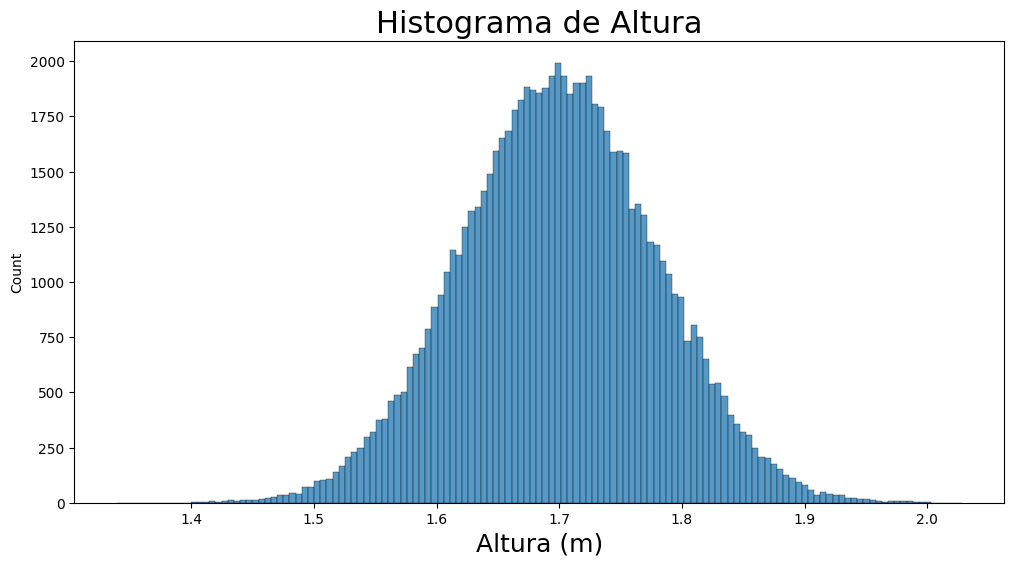

In [87]:
ax = sns.histplot(datos.Altura, kde = False) # histplot es histograma
ax.figure.set_size_inches(12, 6)

ax.set_title('Histograma de Altura', fontsize = 22)
ax.set_xlabel('Altura (m)', fontsize = 18)
plt.show()

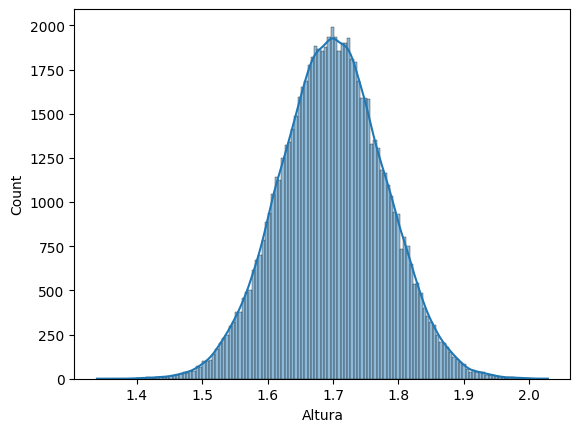

In [88]:
ax = sns.histplot(datos.Altura, kde = True) # histplot es histograma

# kde es estimación de densidad por núcleo / kde=False → solo barras / kde=True → barras + curva suave que indica dónde se concentran más los datos.

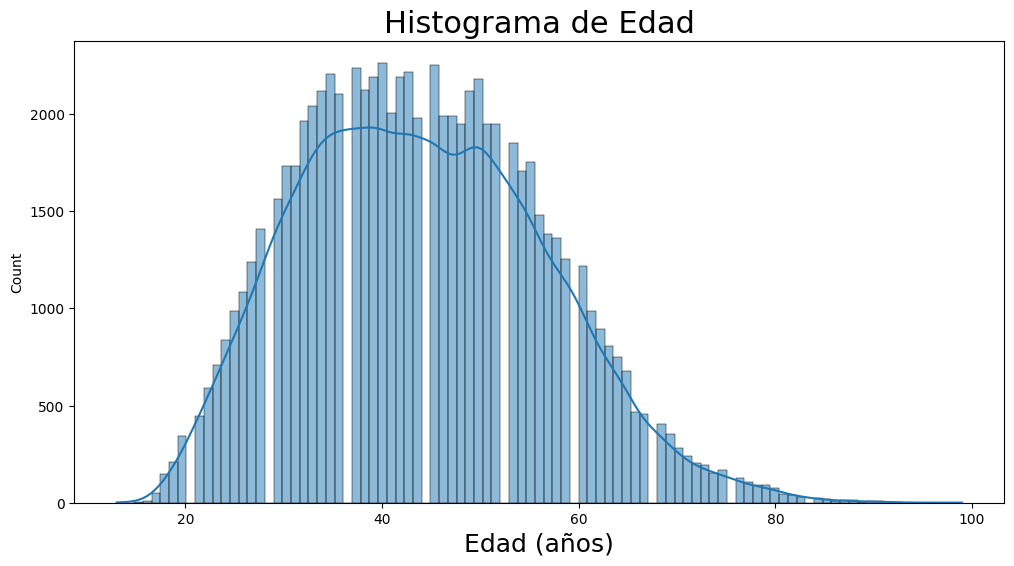

In [90]:
ax = sns.histplot(datos.Edad, kde = True) # histplot es histograma
ax.figure.set_size_inches(12, 6)

ax.set_title('Histograma de Edad', fontsize = 22)
ax.set_xlabel('Edad (años)', fontsize = 18)
plt.show()

# <font color=#56B4E9>3 MEDIDAS DE TENDENCIA CENTRAL</font>
***

## DataFrame de ejemplo

In [91]:
df = pd.DataFrame(data = {'María': [8, 10, 4, 8, 6, 10, 8],
                          'Pedro': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Pablo': [7.5, 8, 7, 8, 8, 8.5, 7]},
                  index = ['Matemática',
                           'Portugués',
                           'Inglés',
                           'Geografía',
                           'Historia',
                           'Física',
                           'Química'])
df.rename_axis('Asignaturas', axis = 'columns', inplace = True)
df

Asignaturas,María,Pedro,Pablo
Matemática,8,10.0,7.5
Portugués,10,2.0,8.0
Inglés,4,0.5,7.0
Geografía,8,1.0,8.0
Historia,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


## <font color=#56B4E9>3.1 Media aritmética</font>
***

Es representada por $\mu$ cuando se refiere a la población y por $\bar{X}$ cuando se refiere a la muestra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

donde

$n$ = número de observaciones (registros)

$X_i$ = valor de la i-ésima observación (registro)

In [92]:
# Promedio
df['María'].mean()

np.float64(7.714285714285714)

Ej: Queremos saber la media del ingreso por sexo por las personas del Daset

In [94]:
df_sexo_ingreso = datos.groupby('Sexo')['Ingreso'].mean()
df_sexo_ingreso

,Ingreso
Sexo,
0,2192.441596
1,1566.847393


In [95]:
df_sexo_ingreso.rename(index={0: 'Masculino', 1: 'Femenino'}, inplace=True)
df_sexo_ingreso

,Ingreso
Sexo,
Masculino,2192.441596
Femenino,1566.847393


## <font color=#56B4E9>3.2 Mediana</font>
***

Para obtener la mediana de un conjunto de datos, debemos proceder de la siguiente manera:
1. Ordenar el conjunto de datos;
2. Identificar el número de observaciones (registros) del conjunto de datos ($n$);
3. Identicar el elemento del medio:

> Cuando $n$ sea impar, la posición del elemento del medio se obtendrá de la siguiente manera:


# $$Elemento_{Md} = \frac{n+1}{2}$$

> Cuando $n$ sea par, la posición del elemento mediano se obtendrá de la siguiente manera:


# $$Elemento_{Md} = \frac{n}2$$

4. Obtener la mediana:

> Cuando $n$ sea impar:


# $$Md = X_{Elemento_{Md}}$$

> Cuando $n$ sea par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

### Ejemplo 1 - n impar

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img002.png' width='40%' style="float:left">

### Ejemplo 2 - n par

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img003.png' width='50%' style="float:left">

### Obtener la mediana en nuestro conjunto de datos

## <font color=#56B4E9>3.3 Moda</font>
***

La moda se puede definir como el valor más frecuente de un conjunto de datos. La moda es ampliamente utilizada para datos cualitativos.

### Obteniendo la moda de nuestro dataset

## <font color=#56B4E9>3.4 Relación entre media, mediana e moda</font>
***

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img004.png' width='80%'>

### Evaluando la variable INGRESO

***

### Evaluando la variable ALTURA

***

### Evaluando la variable AÑOS DE ESTUDIO

# <font color=#56B4E9>4 MEDIDAS DE LOCALIZACIÓN</font>
***

## <font color=#56B4E9>4.1 Cuartiles, deciles y percentiles</font>
***

Hay una serie de medidas de posición similares en su diseño a la mediana, aunque no son medidas de tendencia central. Como se sabe, la mediana divide la distribución en dos partes iguales en términos del número de elementos en cada parte. Los cuartiles, por otro lado, permiten que la distribución se divida en cuatro partes iguales en términos del número de elementos en cada uno; deciles en diez partes y centiles en cien partes iguales.

## <font color=#56B4E9>4.2 Box-plot</font>
***

El *box plot* da una idea de la posición, dispersión, asimetría, colas y valores extremos. La posición central está dada por la mediana y la dispersión por $IIQ$ (distancia inter cuartil). Las posiciones relativas de $Q1$, $Mediana$ y $Q3$ dan una idea de la simetría de la distribución. Las longitudes de las colas están dadas por las líneas que van desde el rectángulo a los valores remotos y por los valores extremos.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img005.png' width='65%'>

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img006.png' width='80%'>

# <font color=#56B4E9>5 MEDIDAS DE DISPERSIÓN</font>
***

Aunque las medidas de tendencia central y de localización proporcionan un resumen muy importante de los datos, pueden no ser suficientes para caracterizar diferentes conjuntos, especialmente cuando las observaciones de una distribución dada presentan datos muy dispersos.

## <font color=#56B4E9>5.1 Desviación media absoluta</font>
***


# $$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$


## <font color=#56B4E9>5.2 Varianza</font>
***

### Varianza

La varianza se construye a partir de las diferencias entre cada observación y la media de los datos, es decir, la desviación alrededor de la media. Al calcular la varianza, las desviaciones alrededor de la media son elevadas al cuadrado.

### Varianza de la población

# $$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

### Varianza de la muestra

# $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

## <font color=#56B4E9>5.3 Desviación estándar</font>
***

Una de las restricciones de la varianza es el hecho de que proporciona medidas cuadráticas de las unidades originales; la varianza de las medidas de longitud, por ejemplo, está en unidades de área. Por lo tanto, el hecho de que las unidades sean diferentes dificulta la comparación de la dispersión con las variables que la definen. Una forma de eliminar esta dificultad es considerar su raíz cuadrada.

### Desviación estándar de la población

# $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$


### Desviación estándar de la muestra

# $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$